
# Project: Investigate TMDb movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

> ● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

> ● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

> ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

**Importing various python library**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from wordcloud import WordCloud

<a id='wrangling'></a>
## Data Wrangling


### General Properties
**Importing the dataset, and finding dimentions of the dataframe**

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdbmovies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#find number of patient(rows) and their user ratings and revenue(columns)
df.shape

(10866, 21)

In [4]:
#inspect data types and look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (removing unused columns in dataset)



> 1. **Deleting unused columns**

In [5]:
#Delete the columns
df = df.drop(columns = ['imdb_id','cast','homepage','tagline','budget_adj','revenue_adj'])
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> 2. **Change the format of *release_date* to standard date format**

In [7]:
df.release_date = pd.to_datetime(df['release_date'])

In [8]:
#printing the changed dataset
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


> 3. **Remove zero from revenue and budget**

In [21]:
#Create list of budget and revenue
list_br = ['budget','revenue']

#In this list we replace values '0' to NAN
df[list_br]= df[list_br].replace(0, np.NAN)

#Removing all rows which has NAN in 'list_br'
df.dropna(subset = list_br, inplace = True)

rows, col = df.shape
#We need to reduce count of rows by one to as contain header row
print("Now we have only {} movies, after we remove entries".format(rows-1))

Now we have only 3855 movies, after we remove entries


> 4. **Removing all duplicacy's rows**

In [26]:
rows , col = df.shape
df.drop_duplicates(keep = 'first', inplace = True)
print("There are {} total of movies, and {} no. of columns of dataset ".format(rows-1, col))

There are 3854 total of movies, and 15 no. of columns of dataset 


> 5. Replace '0' with 'NAN' in runtime

In [28]:
#Replacing '0' with NaN in runtime column
df['runtime'] = df['runtime'].replace(0, np.NAN)

<a id='eda'></a>
## Exploratory Data Analysis




### Question 1: How runtime of movies has changed over years ?

In [29]:
#Selecting runtime which is greater than 40
df = df[df['runtime']>40]

In [30]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3852.000000,3852.000000,3.852000e+03,3.852000e+03,3852.000000,3852.000000,3852.000000,3852.000000
mean,39898.582295,1.191965,3.722223e+07,1.077371e+08,109.266355,527.967030,6.167679,2001.265317
std,67238.333096,1.475428,4.221132e+07,1.765711e+08,19.824710,880.118237,0.794813,11.281632
min,5.000000,0.001117,1.000000e+00,2.000000e+00,42.000000,10.000000,2.200000,1960.000000
25%,6072.750000,0.462529,1.000000e+07,1.360627e+07,95.750000,71.000000,5.700000,1995.000000
50%,11320.000000,0.797913,2.400000e+07,4.483448e+07,106.000000,204.000000,6.200000,2004.000000
75%,38576.000000,1.369877,5.000000e+07,1.242804e+08,119.000000,580.250000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


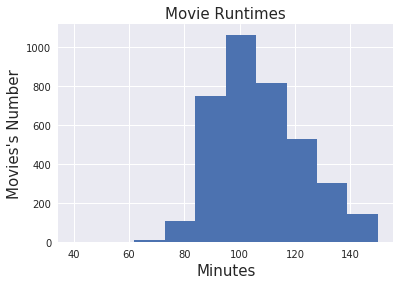

In [31]:
plt.hist(df['runtime'],range=(40,150),bins=10)
plt.title('Movie Runtimes', fontsize=15)
plt.ylabel('Movies\'s Number', fontsize=15)
plt.xlabel('Minutes', fontsize=15)
plt.show()

> **we can see from this histogram plurality of movies have main_time from 90 to 110 minutes**

In [32]:
group_movies = df['runtime'].groupby(df['release_year']).describe()

In [33]:
average_runtime = group_movies['mean']
avg_runtime_min = group_movies['mean'] - group_movies['std']
avg_runtime_max = group_movies['mean'] + group_movies['std']

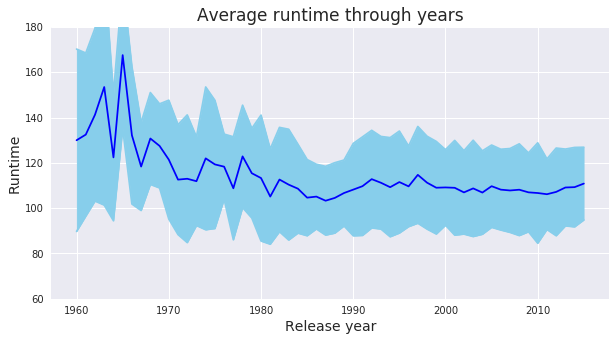

In [34]:
fig, x = plt.subplots(figsize=(10,5))
x.plot(average_runtime, color ='blue')
x.plot(avg_runtime_min, color= 'skyblue')
x.plot(avg_runtime_max, color = 'skyblue')
x.fill_between(group_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average runtime through years', fontsize=17)
x.set_ylabel('Runtime', fontsize=14)
x.set_xlabel('Release year', fontsize= 14)
x.set_ylim(60,180)
plt.show()

In [35]:
movies_with_decades = df.copy()
movies_with_decades['release_year']=((df['release_year']//10)*10).astype('int64')

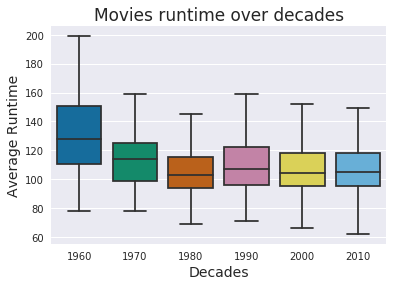

In [36]:
sns.boxplot(y='runtime', x='release_year',data=movies_with_decades,palette= 'colorblind',showfliers = False)
plt.ylabel('Average Runtime',fontsize=14)
plt.xlabel('Decades', fontsize = 14)
plt.title('Movies runtime over decades', fontsize= 17)
plt.show()

**As we see the above graphs represented the average runtime of movies from year to year and decades, the conclution is the change of movies's runtime not noticeable over time.**

### Question 2 : What are the longest and shortest movies from the dataset?

In [37]:
print(df.original_title[df.runtime == df.runtime.max()])
print(df.runtime[df.runtime == df.runtime.max()])

2107    Carlos
Name: original_title, dtype: object
2107    338
Name: runtime, dtype: int64


In [38]:
print(df.original_title[df.runtime == df.runtime.min()])
print(df.runtime[df.runtime == df.runtime.min()])

3239    Dr. Horrible's Sing-Along Blog
Name: original_title, dtype: object
3239    42
Name: runtime, dtype: int64


**The longest movie from the dataset is 'The Story of Film: An Odyssey' with run-time 900 min**

**The shortest movies from dataset is 'Marvel: 75 Years, From Pulp to Pop!','Hulk vs. Thor','Under the Sea 3D','Amy Schumer: Mostly Sex Stuff','Deep Sea 3D' with run-time 41 min**

### Question 3 :  What are the most used keywords from the moveis?

In [39]:
words = ','.join(df['keywords'].str.cat(sep='|').split('|'))

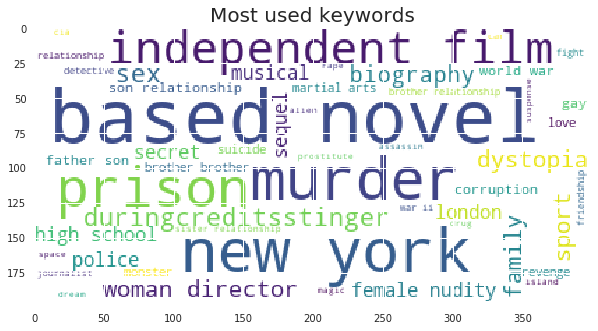

In [40]:
wc = WordCloud(max_words = 50, background_color='white').generate(words)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title('Most used keywords',size=20)
plt.show()

### Qeustion 4 : What kind of attributes are associated of the dataset ?

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
id,1.000000,0.188820,-0.027584,-0.003290,-0.036557,0.111399,-0.001073,0.489959,0.003873
popularity,0.188820,1.000000,0.446867,0.615475,0.214964,0.780064,0.318318,0.173207,0.596157
budget,-0.027584,0.446867,1.000000,0.688496,0.260414,0.556845,0.024691,0.267877,0.526759
revenue,-0.003290,0.615475,0.688496,1.000000,0.250334,0.754528,0.227554,0.139016,0.979136
runtime,-0.036557,0.214964,0.260414,0.250334,1.000000,0.273956,0.356356,-0.114653,0.220437
vote_count,0.111399,0.780064,0.556845,0.754528,0.273956,1.000000,0.387713,0.207092,0.728320
vote_average,-0.001073,0.318318,0.024691,0.227554,0.356356,0.387713,1.000000,-0.133725,0.259786
release_year,0.489959,0.173207,0.267877,0.139016,-0.114653,0.207092,-0.133725,1.000000,0.087877
profit,0.003873,0.596157,0.526759,0.979136,0.220437,0.728320,0.259786,0.087877,1.000000


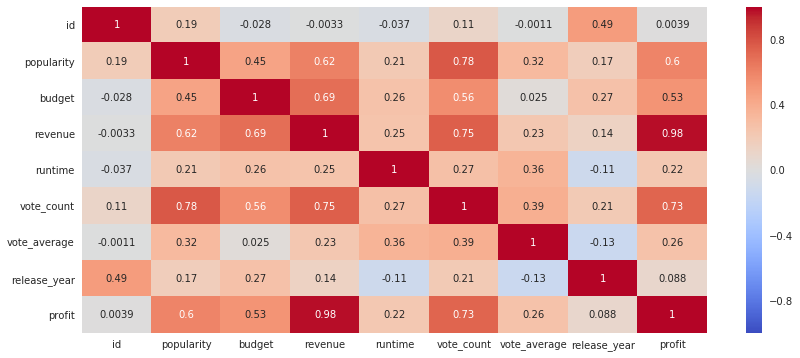

In [41]:
df['profit'] = df['revenue'] - df['budget']
"""Calculate the profit in seperate columns."""
c = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(c, cmap='coolwarm', annot = True, center=0, vmin=-1, vmax=1)
c

**We have append new column named *profit* into dataset**

**heatmap tell us that there are many attributes that have high positive correlation with one another**

***popularity* has high positive correlation with *vote count*, that mean a popular movie have to get more vote from critics. *popularity* also has high correlation with *profit*, that mean a popular movie gain more money.**

***budget* has high correlation with *revenue*, that indicates when movie have high budget it tends to gain more revenue**

### Question 5 : Which production companies have produced most films ?

In [42]:
dummies = df['production_companies'].str.get_dummies(sep='|')
dummies.head(10)

,"""DIA"" Productions GmbH & Co. KG",1019 Entertainment,10th Hole Productions,11:11 Mediaworks,120dB Films,1492 Pictures,1818,1821 Pictures,1984 Private Defense Contractors,2 Bridges Productions,...,Zweites Deutsches Fernsehen (ZDF),abramoff Production,area japan,chateau productions,double A Films,erbp,iDeal Partners Film Fund,icon,platinum studios,uFilm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dummies_c = dummies[dummies.columns].apply(lambda x: sum(x.values))
dummies_c

"DIA" Productions GmbH & Co. KG         1
1019 Entertainment                      1
10th Hole Productions                   3
11:11 Mediaworks                        1
120dB Films                             2
1492 Pictures                          15
1818                                    1
1821 Pictures                           1
1984 Private Defense Contractors        5
2 Bridges Productions                   1
2 Entertain                             2
2 Loop Films                            1
20th Century Fox                       38
20th Century Fox Home Entertainment     2
20th Century Fox Russia                 1
20th Century Fox Television             1
21 Laps Entertainment                  11
21st Century Film Corporation           1
2262730 Ontario                         1
26 Films                                3
27 Films Production                     1
2929 Productions                        9
2S Films                                1
3 Arts Entertainment              

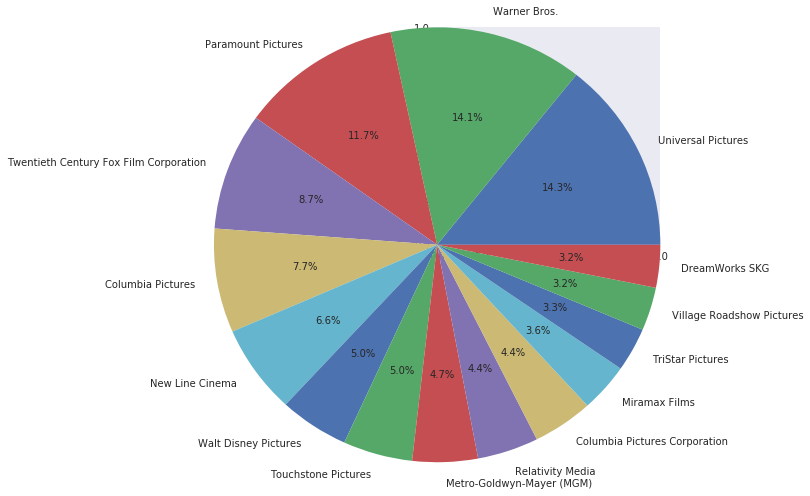

In [44]:
dummies_c.sort_values(0, ascending=False).head(15).plot.pie(autopct="%1.1f%%", frame = True,figsize=(4,4))
plt.show()

**The pie chart give us top 15 production companies**

**The top 5 companiesare:**

**1.Universal Pictures**

**2.Warner Bros.**

**3.Paramount Pictures**

**4.Twentieth Century Fox Film Corporation**

**5.Columbia Pictures**

### Question 6: What is the most and least movies profit?

In [68]:
import pprint

#defining function
def calculs(col):
    """"Selecting two high profit and low as dataframe and grouped it in one dataframe"""
    #highest earned profit
    high_profit = df[col].idxmax()
    high_details = pd.DataFrame(df.loc[high_profit])
    
    #lowest earned profit
    low_profit = df[col].idxmin()
    low_details = pd.DataFrame(df.loc[low_profit])
    
    #collection all details in one place
    details = pd.concat([high_details, low_details], axis = 1)
    
    return details

calculs('profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> *Avatar* is the highest profit i.e 2.54451e+09	

> *The Warrior's Way* is the least profit i.e -4.13912e+08

### Question 7 : Average budget of movies? 

In [71]:
#Function to calculate average of budget
def avg_budget(coll):
    return df[coll].mean()
avg_budget('budget')

37222234.697300106

<a id='conclusions'></a>

## Conclusions 
### This was very interesting data analysis, we come out some facts about movies. so we can conclude following:

> 1. At the end i can say the most runtime of movies have main_time from 90 to 110 minutes
> 2. Also high budget it tends to gain more revenue
> 3. The most company have produced films is *Universal Pictures*
> 4. The highest movies profit is Avatar with profit 2.54451e+09
> 5. Average budget may be around 40 million dollar

> **Limitaions:** This analysis was done considering the movies which had significant amount of profit of around 50 million dollar. This might not be completely error free but by following this suggestion one can increase the probability of a movies to become a hit. As mentioned before the budget and revenue column don't have currency unit, it might be possible different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong.

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0